[KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [70]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data from Social_Network_Ads.csv file into a DataFrame
df = pd.read_csv("Social_Network_Ads.csv")


In [71]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [72]:
# Define the feature and target values

X = df.iloc[:, :-1].values
y = df["Purchased"]

In [73]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler

# create instances of StandardScaler
sc = StandardScaler()

# transform X using fit_transform method of sc
X = sc.fit_transform(X)

In [74]:
# Split X, y into X_train, X_test, y_train, y_test with 7.5:2.5 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

In [75]:
# Build a KNN model on the Training Set
#   k=5
#   Euclidean distance
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p=2)

# fit
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
# Predict the test set results y_pred (y_hat) from X_test 

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [77]:
# Compute Confussion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

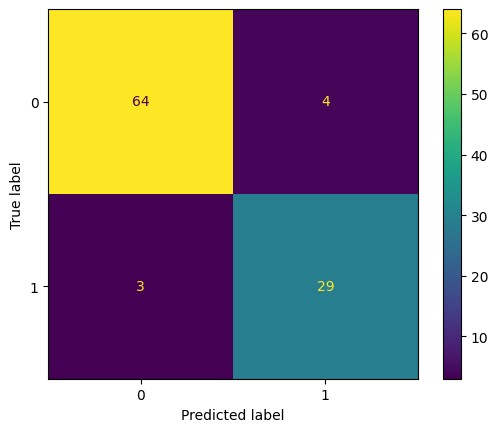

In [78]:
# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
disp.plot()
plt.show()

In [79]:
# Import metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy Score
print('Accuracy = ', accuracy_score(y_test, y_pred))

# Precision Score
print('Precision = ', precision_score(y_test, y_pred))

# Recall Score
print('Recall = ', recall_score(y_test, y_pred))

# F1 Score
print('F1_Score = ', f1_score(y_test, y_pred))


Accuracy =  0.93
Precision =  0.8787878787878788
Recall =  0.90625
F1_Score =  0.8923076923076922


In [80]:
# Predict y_hat for Age=30,	EstimatedSalary=87000
y_hat = clf.predict(sc.transform([[30, 87000]]))
y_hat

array([0], dtype=int64)

In [81]:
# Visualise the Decision Surface on Test set results

from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

# Define bounds of the domain
min1, max1 = X_set[:, 0].min() - 10, X_set[:, 0].max() + 10
min2, max2 = X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000

# Define the x and y scale
# step = 0.25 means all the pixels were actually with a 0.25 resolution
x1_grid = np.arange(min1, max1, 0.25)
x2_grid = np.arange(min2, max2, 0.25)

# Create the grid
# step=0.25 means all the pixels were actually with a 0.25 resolution
X1, X2 = np.meshgrid(x1_grid, x2_grid)

# Flatten each grid to a vector
r1, r2 = X1.flatten(), X2.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# Horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# Make predictions for the grid
y_hat = clf.predict(sc.transform(grid))

# Reshape the predictions back into a grid
y_hat = y_hat.reshape(X1.shape)

# Plot the grid of X1, X2 and y_hat values as a surface
# (This is the line applying the classifier on all the pixel observation points,
# it colors all the red pixel points and the green pixel points,
# make the contour between red and green regions)
plt.contourf(X1, X2, y_hat, alpha = 0.75, cmap=ListedColormap(('red', 'green')))

# Plot the limits of the Age and the Estimated Salary lines
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plots all the data points that are the real values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label = j)

    
plt.title('K-NN Model')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show() 